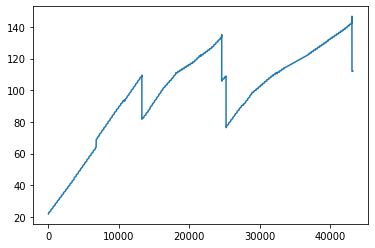

In [2]:
import pandas
import matplotlib.pyplot as plt
usecol = ["Disk_Usage_MB", "Ref_Date_Time"]
dataset = pandas.read_csv('cassandra_zstd_compressd.csv', usecols=usecol, engine='python')
dataset = dataset.set_index("Ref_Date_Time")
#dataset.head(7)
plt.plot(dataset)
plt.show()

In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
dataframe = pandas.read_csv('cassandra_zstd_compressd.csv', usecols=[6])
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset)

[[ 21.896]
 [ 21.9  ]
 [ 21.904]
 ...
 [112.108]
 [112.108]
 [112.112]]


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

19697 9702


In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
trainX

array([[[0.0000000e+00]],

       [[3.2037497e-05]],

       [[6.4074993e-05]],

       ...,

       [[6.7933357e-01]],

       [[6.7936558e-01]],

       [[6.7936558e-01]]], dtype=float32)

In [11]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
19695/19695 - 13s - loss: 0.0029
Epoch 2/100
19695/19695 - 24s - loss: 2.4151e-05
Epoch 3/100
19695/19695 - 23s - loss: 1.9026e-05
Epoch 4/100
19695/19695 - 24s - loss: 1.4089e-05
Epoch 5/100
19695/19695 - 22s - loss: 9.9516e-06
Epoch 6/100
19695/19695 - 21s - loss: 8.3985e-06
Epoch 7/100
19695/19695 - 22s - loss: 8.2087e-06
Epoch 8/100
19695/19695 - 20s - loss: 7.8670e-06
Epoch 9/100
19695/19695 - 20s - loss: 7.8683e-06
Epoch 10/100
19695/19695 - 20s - loss: 8.1968e-06
Epoch 11/100
19695/19695 - 20s - loss: 8.0240e-06
Epoch 12/100
19695/19695 - 20s - loss: 7.5909e-06
Epoch 13/100
19695/19695 - 20s - loss: 7.9266e-06
Epoch 14/100
19695/19695 - 20s - loss: 7.7166e-06
Epoch 15/100
19695/19695 - 19s - loss: 7.8058e-06
Epoch 16/100
19695/19695 - 21s - loss: 7.9990e-06
Epoch 17/100
19695/19695 - 25s - loss: 7.6593e-06
Epoch 18/100
19695/19695 - 20s - loss: 8.0589e-06
Epoch 19/100
19695/19695 - 20s - loss: 7.4527e-06
Epoch 20/100
19695/19695 - 20s - loss: 7.8216e-06
Epoch 21/100


In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [14]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.30 RMSE
Test Score: 0.50 RMSE


In [15]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [16]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

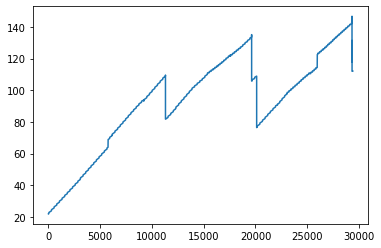

In [17]:
plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

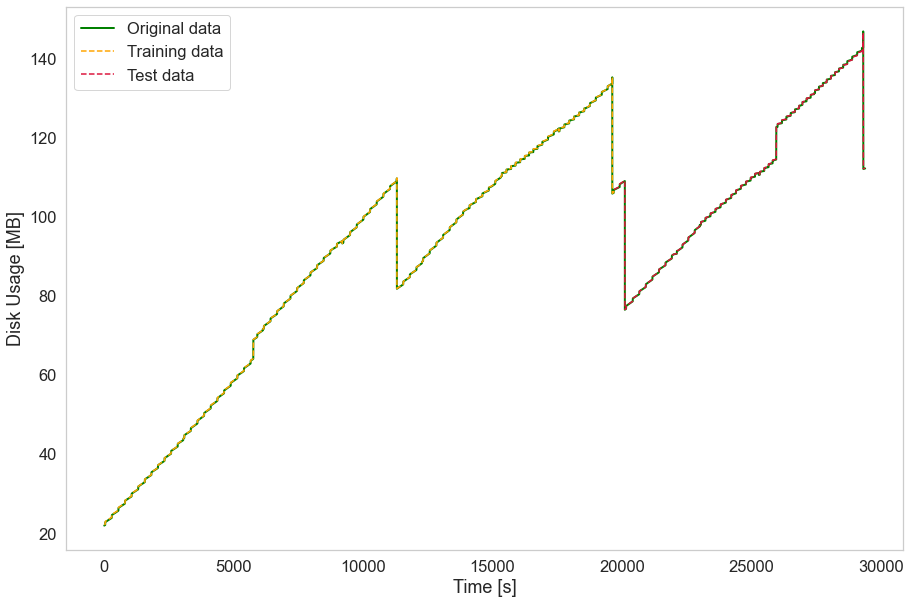

In [21]:
import seaborn as sns
fig3 = plt.figure(figsize=(15, 10))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

plt.plot(scaler.inverse_transform(dataset),color = "green", linewidth = 2)
plt.plot(trainPredictPlot, color = "orange", linestyle = "--")
plt.plot(testPredictPlot, color = "crimson", linestyle = "--")
# plt.title("Redis Model")
plt.legend(["Original data", "Training data", "Test data"])
plt.ylabel("Disk Usage [MB]")
plt.xlabel("Time [s]")

plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\plots_prediction_models\cassandra_oscil_lstm_model.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\plots_prediction_models\cassandra_oscil_lstm_model.pdf", dpi = 300)
plt.show()

In [19]:
x = [[[16000]]]
model.predict(x)

array([[2.3554478]], dtype=float32)

In [20]:
model.save("cassandra_oscil_model.h5")
print("Saved model to disk")

Saved model to disk
